In [1]:
from __future__ import division

from models import *
from utils.logger import *
from utils.utils import *
from utils.datasets import *
from utils.parse_config import *
from test import evaluate

from terminaltables import AsciiTable

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

/Users/takashiroshota/Desktop/pytorch_advanced/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/takashiroshota/Desktop/pytorch_advanced/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/takashiroshota/Desktop/pytorch_advanced/py3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

In [2]:
data_config = parse_data_config('config/custom.data')
train_path = data_config["train"]

In [3]:
dataset = ListDataset(train_path, augment=False, multiscale=True)

In [4]:
import matplotlib.pyplot as plt
import cv2

In [19]:
img = dataset[0][1].numpy().transpose((1,2,0))
anno = dataset[0][2].numpy()
print(anno)

[[ 0.         10.          0.29003906  0.5263672   0.01757812  0.02539062]
 [ 0.          9.          0.3173828   0.5517578   0.03710938  0.06054688]
 [ 0.          6.          0.3798828   0.5498047   0.03710938  0.05664062]
 [ 0.          1.          0.5751953   0.546875    0.01757812  0.0546875 ]
 [ 0.          2.          0.68652344  0.54785156  0.03710938  0.06054688]
 [ 0.          8.          0.7529297   0.546875    0.04101562  0.05859375]]


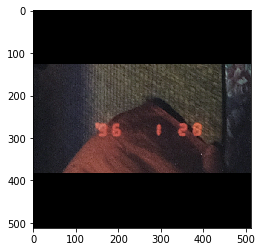

In [20]:
plt.imshow(img)

In [21]:
anno[:, 2:] *= 512

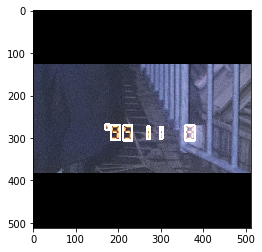

In [53]:
n = 51
img = dataset[n][1].numpy().transpose((1,2,0))
anno = dataset[n][2].numpy()
anno[:, 2:] *= 512
for data in anno:
    x_center, y_center, width, height = data[2], data[3], data[4], data[5]
    xmin, ymin, xmax, ymax = x_center-width/2, y_center-height/2, x_center+width/2, y_center+height/2
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
    # img = cv2.circle(img, (xmin, ymin), 10, (1, 1, 1), thickness=3)
    # img = cv2.circle(img, (xmax, ymax), 10, (1, 1, 1), thickness=3)
    # print((xmin, ymin), (xmax, ymax))
    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (1, 1, 1), thickness=3)
plt.imshow(img.get())